<a href="https://colab.research.google.com/github/PrannayH/Car-Resale_Price-Prediction/blob/main/CarResalePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('Cars.csv')
print(data.head())
print(data.info())
print(data.describe())



   model_year    maker        model_name    city  distance_covered (km)  \
0        2012   Maruti      Alto K10 VXI  Mumbai                  29067   
1        2011  Hyundai  i20 SPORTZ 1.2 O  Mumbai                  36791   
2        2010   Maruti        A Star VXI  Mumbai                  35171   
3        2011  Hyundai   Santro Xing GLS  Mumbai                  19908   
4        2012  Hyundai   Santro Xing GLS  Mumbai                  43847   

  fuel_type  pre_owner  price (₹)  
0    Petrol  2nd Owner     165199  
1    Petrol  2nd Owner     326099  
2    Petrol  1st Owner     195199  
3    Petrol  1st Owner     195199  
4    Petrol  3rd Owner     203299  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3365 entries, 0 to 3364
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   model_year             3365 non-null   int64 
 1   maker                  3365 non-null   object
 2   model_name        

In [ ]:
data.isnull().sum()



,0
model_year,0
maker,0
model_name,0
city,0
distance_covered (km),0
fuel_type,0
pre_owner,0
price (₹),0


In [ ]:
data['model_year'] = pd.to_datetime(data['model_year'], format='%Y')
data['price (₹)'] = data['price (₹)'].replace('[\₹,]', '', regex=True).astype(float)
data.head()


,model_year,maker,model_name,city,distance_covered (km),fuel_type,pre_owner,price (₹)
0,2012-01-01,Maruti,Alto K10 VXI,Mumbai,29067,Petrol,2nd Owner,165199.0
1,2011-01-01,Hyundai,i20 SPORTZ 1.2 O,Mumbai,36791,Petrol,2nd Owner,326099.0
2,2010-01-01,Maruti,A Star VXI,Mumbai,35171,Petrol,1st Owner,195199.0
3,2011-01-01,Hyundai,Santro Xing GLS,Mumbai,19908,Petrol,1st Owner,195199.0
4,2012-01-01,Hyundai,Santro Xing GLS,Mumbai,43847,Petrol,3rd Owner,203299.0


EDA


In [ ]:
print(data.describe())


                          model_year  distance_covered (km)     price (₹)
count                           3365            3365.000000  3.365000e+03
mean   2013-11-16 17:23:43.952451840           60937.813967  4.336549e+05
min              2001-01-01 00:00:00              60.000000  2.700000e+04
25%              2012-01-01 00:00:00           30598.000000  2.769990e+05
50%              2014-01-01 00:00:00           53488.000000  3.647990e+05
75%              2016-01-01 00:00:00           82414.000000  4.975990e+05
max              2021-01-01 00:00:00          428123.000000  3.600000e+06
std                              NaN           41342.775191  2.595909e+05


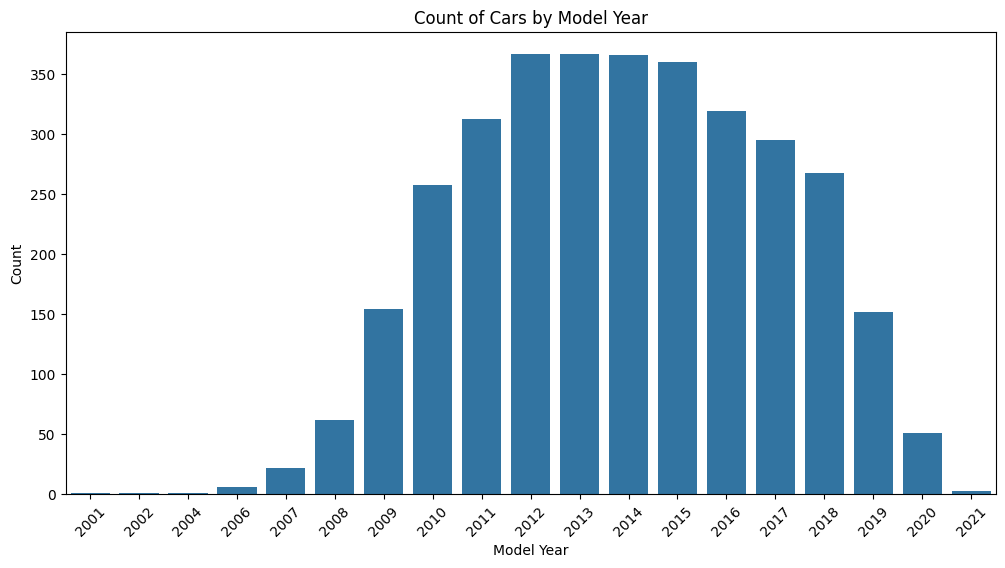

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x=data['model_year'].dt.year)
plt.title('Count of Cars by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


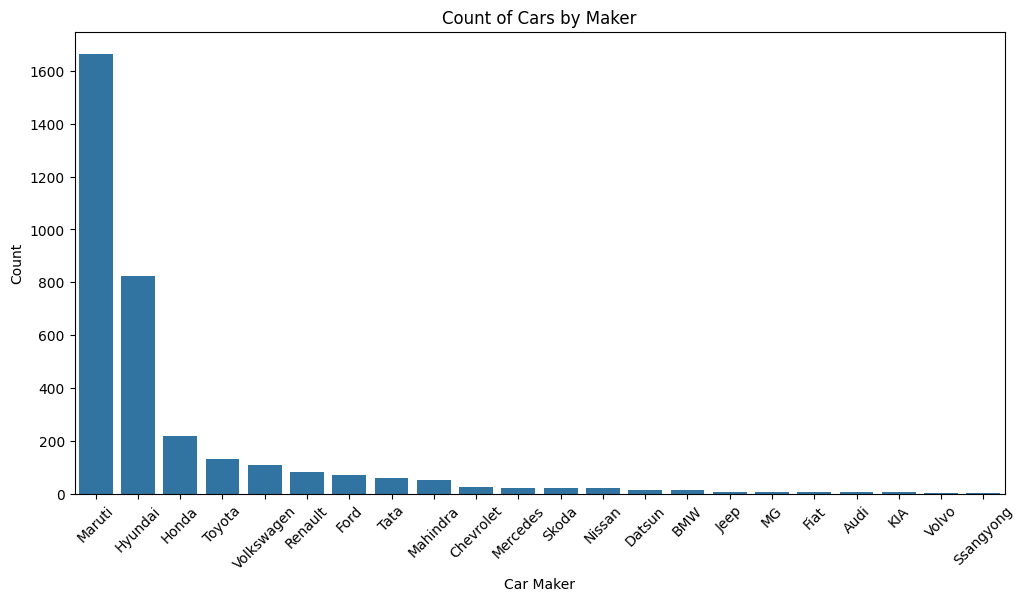

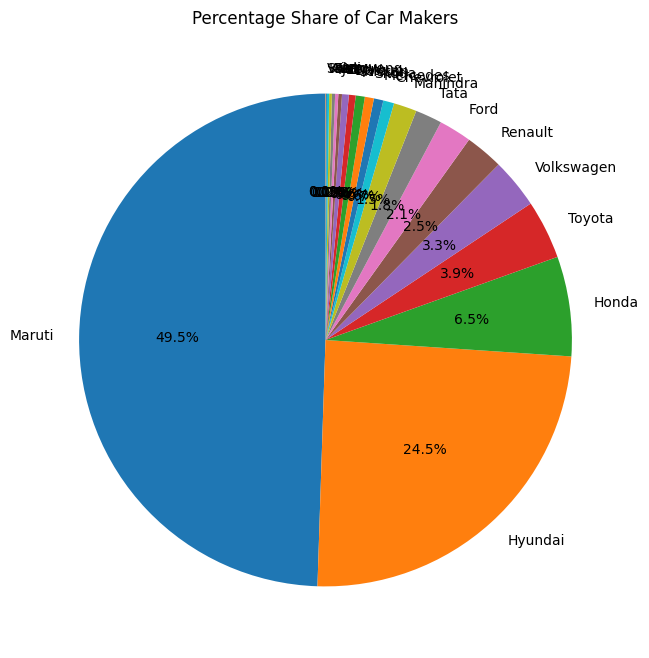

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='maker', order=data['maker'].value_counts().index)
plt.title('Count of Cars by Maker')
plt.xlabel('Car Maker')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 8))
data['maker'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Percentage Share of Car Makers')
plt.ylabel('')
plt.show()


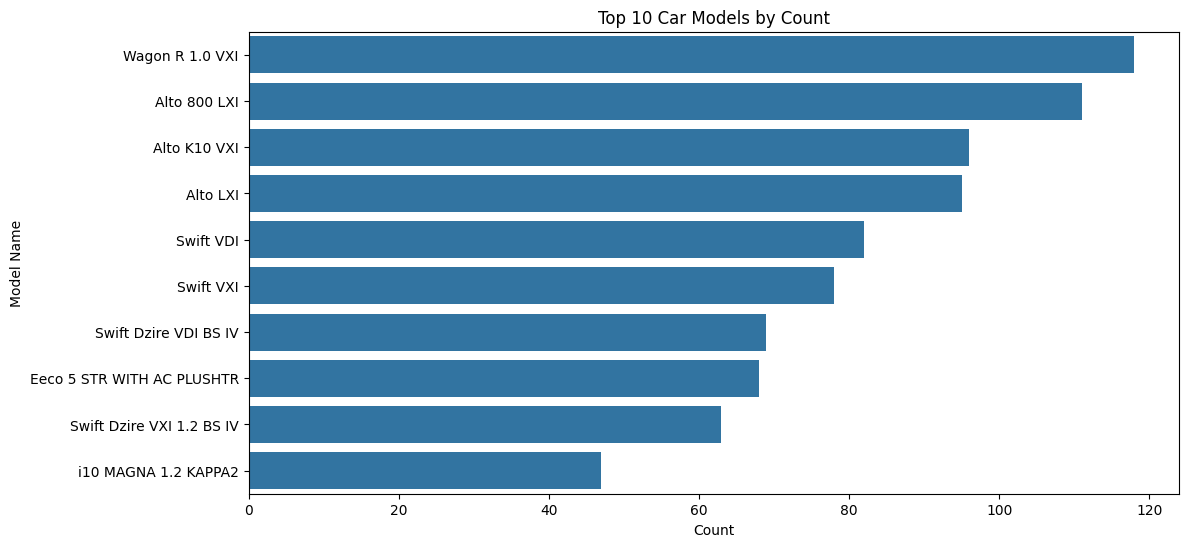

In [ ]:
top_models = data['model_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_models.values, y=top_models.index)
plt.title('Top 10 Car Models by Count')
plt.xlabel('Count')
plt.ylabel('Model Name')
plt.show()


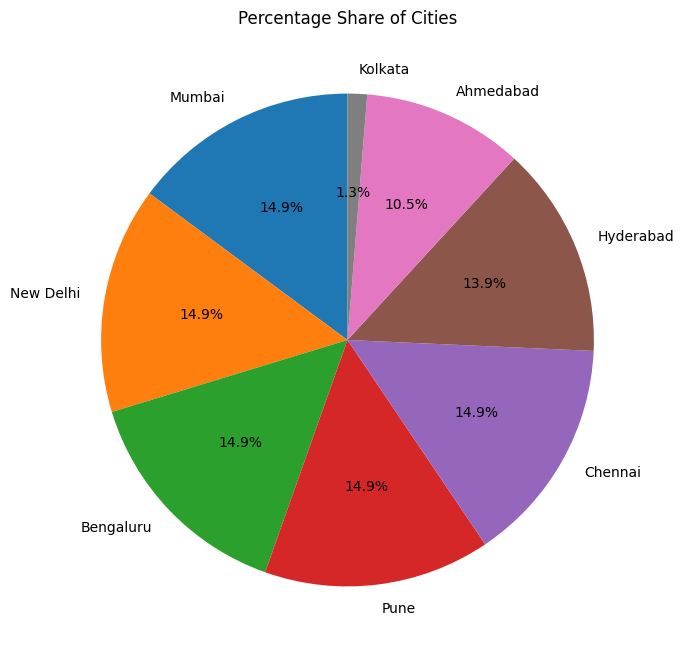

In [ ]:
plt.figure(figsize=(8, 8))
data['city'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Percentage Share of Cities')
plt.ylabel('')
plt.show()


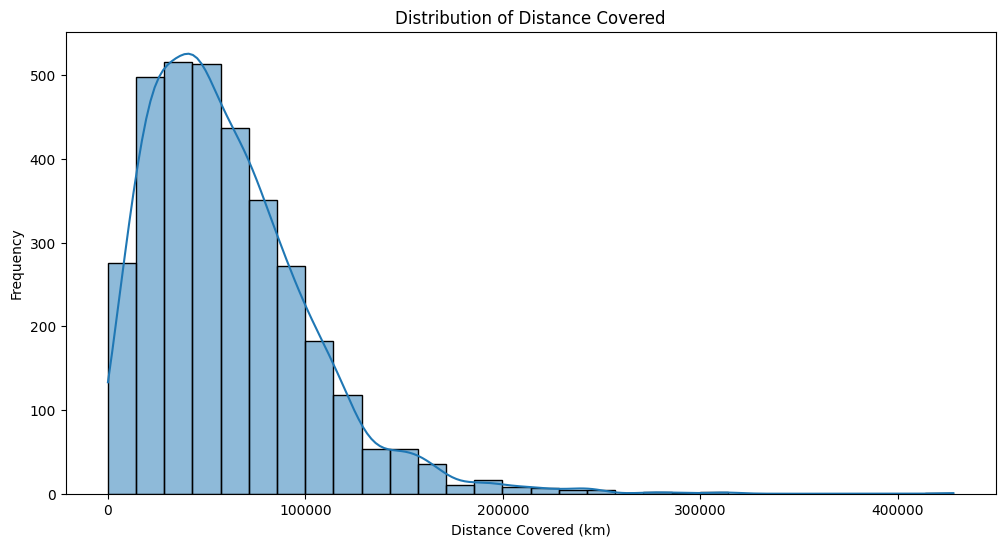

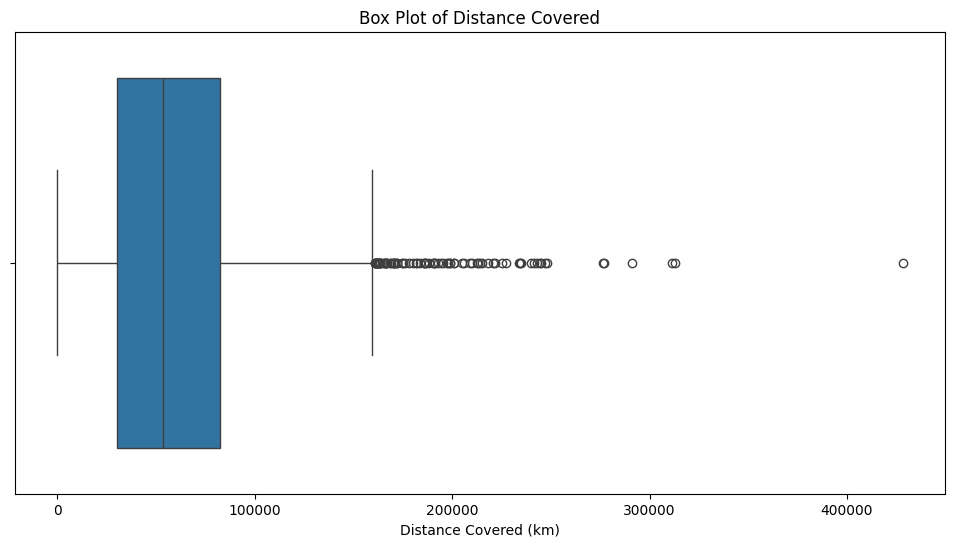

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['distance_covered (km)'], bins=30, kde=True)
plt.title('Distribution of Distance Covered')
plt.xlabel('Distance Covered (km)')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='distance_covered (km)')
plt.title('Box Plot of Distance Covered')
plt.xlabel('Distance Covered (km)')
plt.show()


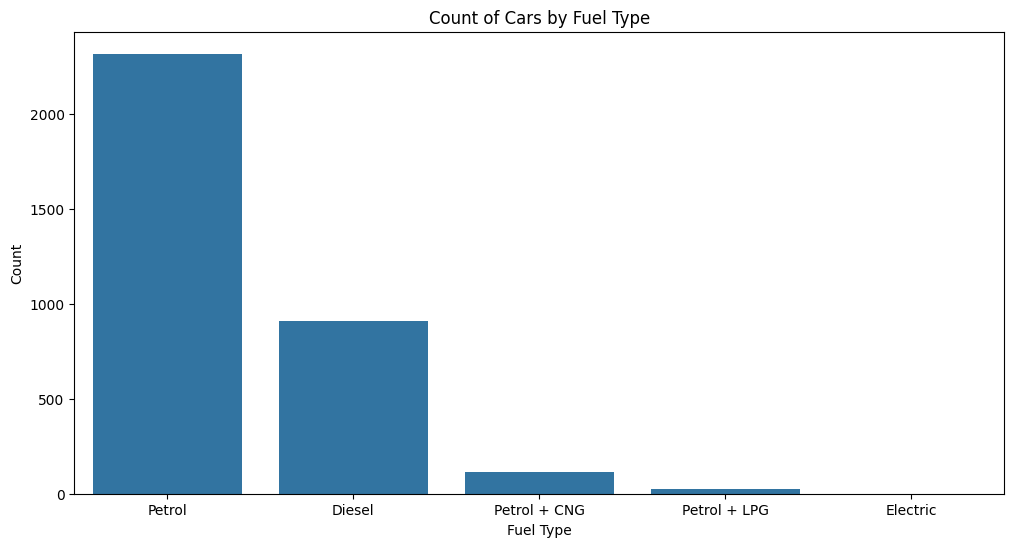

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='fuel_type', order=data['fuel_type'].value_counts().index)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()



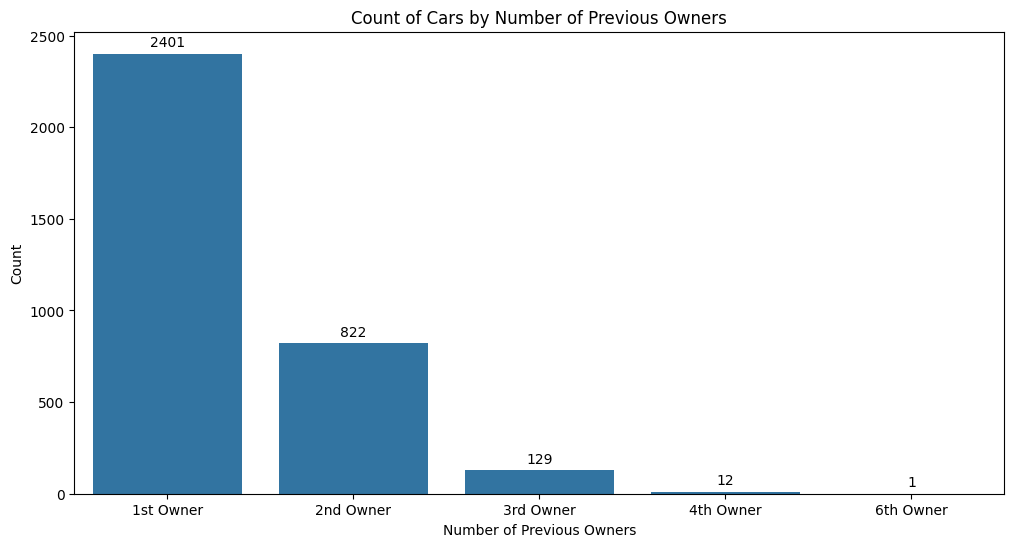

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='pre_owner', order=data['pre_owner'].value_counts().index)

# Adding counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline',
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points')

plt.title('Count of Cars by Number of Previous Owners')
plt.xlabel('Number of Previous Owners')
plt.ylabel('Count')
plt.show()



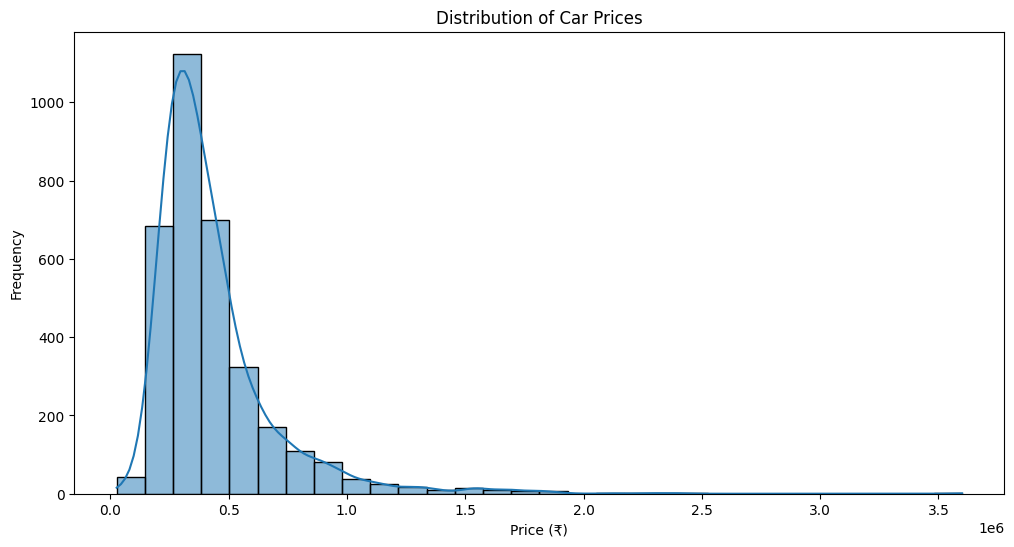

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['price (₹)'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
data.head()

,model_year,maker,model_name,city,distance_covered (km),fuel_type,pre_owner,price (₹)
0,2012-01-01,Maruti,Alto K10 VXI,Mumbai,29067,Petrol,2nd Owner,165199.0
1,2011-01-01,Hyundai,i20 SPORTZ 1.2 O,Mumbai,36791,Petrol,2nd Owner,326099.0
2,2010-01-01,Maruti,A Star VXI,Mumbai,35171,Petrol,1st Owner,195199.0
3,2011-01-01,Hyundai,Santro Xing GLS,Mumbai,19908,Petrol,1st Owner,195199.0
4,2012-01-01,Hyundai,Santro Xing GLS,Mumbai,43847,Petrol,3rd Owner,203299.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Step 1: Load the Data
data = pd.read_csv('Cars.csv')

# Step 2: Encode Categorical Variables
label_encoders = {}
categorical_cols = ['maker', 'model_name', 'city', 'fuel_type', 'pre_owner']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Step 3: Separate Features and Target
X = data.drop('price (₹)', axis=1)  # Features
y = data['price (₹)']  # Target (Price)

# Step 4: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling (optional, but can improve model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Initialize the XGBoost Regressor
xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Step 7: Train the Model
xgboost_model.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = xgboost_model.predict(X_test)

# Step 9: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-Squared: {r2}")

# Step 10: Hyperparameter Tuning (Optional)
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")

# Train the final model with the best parameters
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Make predictions with the final model
final_predictions = final_model.predict(X_test)

# Evaluation Metrics

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error: 55369.28344980498
R-Squared: 0.8594495074813766
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Mean Absolute Error (MAE): 55369.28344980498
Mean Squared Error (MSE): 9135669076.578592
Root Mean Squared Error (RMSE): 95580.69405784096
R-squared (R²): 0.8594495074813766


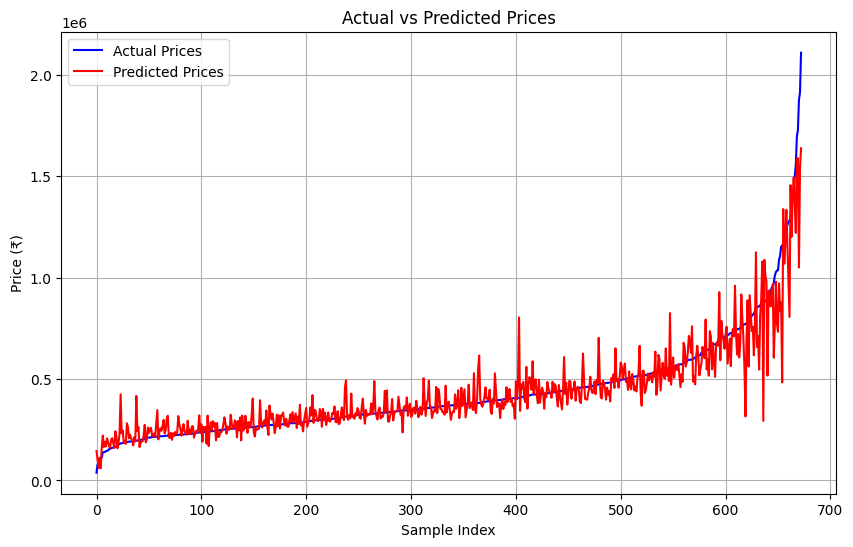

In [ ]:
plt.figure(figsize=(10, 6))

# Sort values for a better visual representation
sorted_indices = np.argsort(y_test.values)
plt.plot(np.array(y_test)[sorted_indices], label='Actual Prices', color='blue')
plt.plot(np.array(y_pred)[sorted_indices], label='Predicted Prices', color='red')

plt.xlabel('Sample Index')
plt.ylabel('Price (₹)')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(data.shape)

(3365, 8)
